# Анализ убытков приложения ProcrastinatePRO+

**Описание проекта**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.

Предстоит изучить:

    откуда приходят пользователи и какими устройствами они пользуются,
    сколько стоит привлечение пользователей из различных рекламных каналов;
    сколько денег приносит каждый клиент,
    когда расходы на привлечение клиента окупаются,
    какие факторы мешают привлечению клиентов.

**План**
1. Ознакомиться с данными
2. Проверить наличие пропусков и дубликатов
3. Выполнить предобработку
4. Задать необходимые функции для дальнейших расчетов
5. Составить профили пользователей
6. Составить профиль платящих пользоваталей в разрезе разных параметров
7. Оценить эффективность раличных каналов привлечения (как окупаются затраты)
8. Определить проблемы неэффективности каналов привлечения

### Загрузка данных и подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import numpy as np

In [2]:
visits = pd.read_csv(r"D:\Загрузки\visits_info_short.csv")
orders = pd.read_csv(r"D:\Загрузки\orders_info_short.csv")
costs = pd.read_csv(r"D:\Загрузки\costs_info_short.csv")

In [3]:
def analysis_df(df):

    print("Info:")
    print(df.info())
    print("\n")

    print("Head:")
    print(df.head())
    print("\n")

    print("Describe:")
    print(df.describe())
    print("\n")

    print("Value Counts:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(df[column].value_counts().to_frame())
            print("\n")
            print('List of Unique')
            print(df[column].unique())
    print("\n")
    
    print('Duplicates:')
    print(df.duplicated().sum())

In [4]:
analysis_df(visits)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


Head:
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
analysis_df(orders)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


Head:
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99


Describe:
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000


Value Counts:
    

In [7]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [8]:
analysis_df(costs)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


Head:
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1


Describe:
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000


Value Counts:
            dt
2019-07-19  10
2019-08-31  10
2019-08-30  10
2019-07-13  10
2019-10-03  10
...         ..
2019-10-18  10
2019-05-03  10
2019-08-29  10
2019-09-02  10
2019-08-10  10

[180 rows x 1 columns]


List of Unique
['2019-05-01' '2019-05-02'

In [9]:
costs = costs.rename(columns={'Channel':'channel'})
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y/%m/%d')

**Вывод** 
Работаем с тремя датасетами: visits - лог сервера с данными о посещениях, orders - выгрузка покупок пользователей за этот период, costs - рекламные расходы.

В датасетах нет пропущенных значений и дубликатов. Изменили только названия колонок и привели даты к нужному типу данных.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.



Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

####  Функция для создания пользовательских профилей

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

#### для расчёта удержания

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### для расчёта конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### для расчёта LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### для сглаживания фрейма

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### для визуализации удержания


In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### для визуализации конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### для визуализации LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(25, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей


In [18]:
profiles = get_profiles(visits, orders, costs)
print('Минимальная дата привлечения:', profiles['dt'].min())
print('Максимальная дата привлечения:',profiles['dt'].max())

Минимальная дата привлечения: 2019-05-01 00:00:00
Максимальная дата привлечения: 2019-10-27 00:00:00


**Вывод** Будем анализировать пользователей, которые были привлечены с 1 мая по 27 октября 2019 года.

- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [19]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False).style.format("{:,.2f}")

,user_id,payer
region,,
United States,"100,002.00",0.07
Germany,"14,981.00",0.04
UK,"17,575.00",0.04
France,"17,450.00",0.04


**Вывод** 
Большинство пользователей приложения из США, там же наблюдается и большая доля платящих пользоваталей (почти 7%). Чуть более 4% пользователей из Германии - платящие, В Великобритании платящих пользователй почти 4%, во Франции данный показатель - 3,8%


- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [20]:
profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False).style.format("{:,.2f}")

,user_id,payer
device,,
Mac,"30,042.00",0.06
iPhone,"54,479.00",0.06
Android,"35,032.00",0.06
PC,"30,455.00",0.05


**Вывод**
Доля платящих клиентов выше среди пользователей Apple, Mac- 6,4%, IPhone-6,2%. 
Среди пользователей PC платящих клментов меньшне всего - 5% от общего числа.

- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [21]:
profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False).style.format("{:,.2f}")

,user_id,payer
channel,,
FaceBoom,"29,144.00",0.12
AdNonSense,"3,880.00",0.11
lambdaMediaAds,"2,149.00",0.10
TipTop,"19,561.00",0.10
RocketSuperAds,"4,448.00",0.08
WahooNetBanner,"8,553.00",0.05
YRabbit,"4,312.00",0.04
MediaTornado,"4,364.00",0.04
LeapBob,"8,553.00",0.03


**Вывод**
Доля платящих пользователей, пришедших из канала FaceBoom больше 12%, а также общее количество пользователей с этого канала велико. Меньшая часть платящих пользователей - "органический трафик".

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.


In [22]:
round(costs['costs'].sum(),2)

105497.3

**Вывод** Всего на рекламную кампанию было потрачено 105.497

- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [23]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs')

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


**Вывод**
Большинство затрат приходятся на источники Tip Top и FaceBoom.

- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

In [24]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

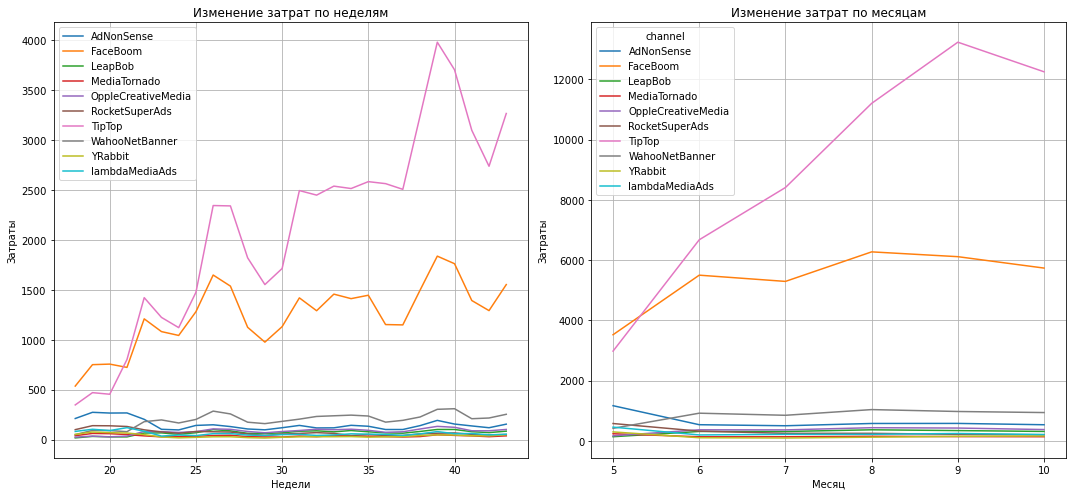

In [25]:
plt.figure(figsize=(15, 7))
# первый график — График изменения затрат по неделям
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Недели')
plt.ylabel('Затраты')
plt.title('Изменение затрат по неделям')

# второй график — График изменения затрат по месяцам
ax2 = plt.subplot(1, 2, 2)  
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.title('Изменение затрат по месяцам')

plt.tight_layout()
plt.show() 

**Вывод** Затраты сильно и почти параллельно растут на каналы Tip Top и FaceBoom, если посмотрим на затраты по месяцам, то кажется, что в октябре затраты снижаются, однако такой вывод пока сделать нельзя, так как мы имеем данные только до 27 числа.


- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [26]:
(profiles
    .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .style.format({'acquisition_cost': '{:.2f}'}))

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод** Самый дорогой и НЕ самый эффективный канал привлечения - Tip Top. Нужно обратить на него внимание. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.



In [27]:
observation_date = datetime(2019,11,1).date()
horizon_days=14
profiles=profiles.query('channel!="organic"')

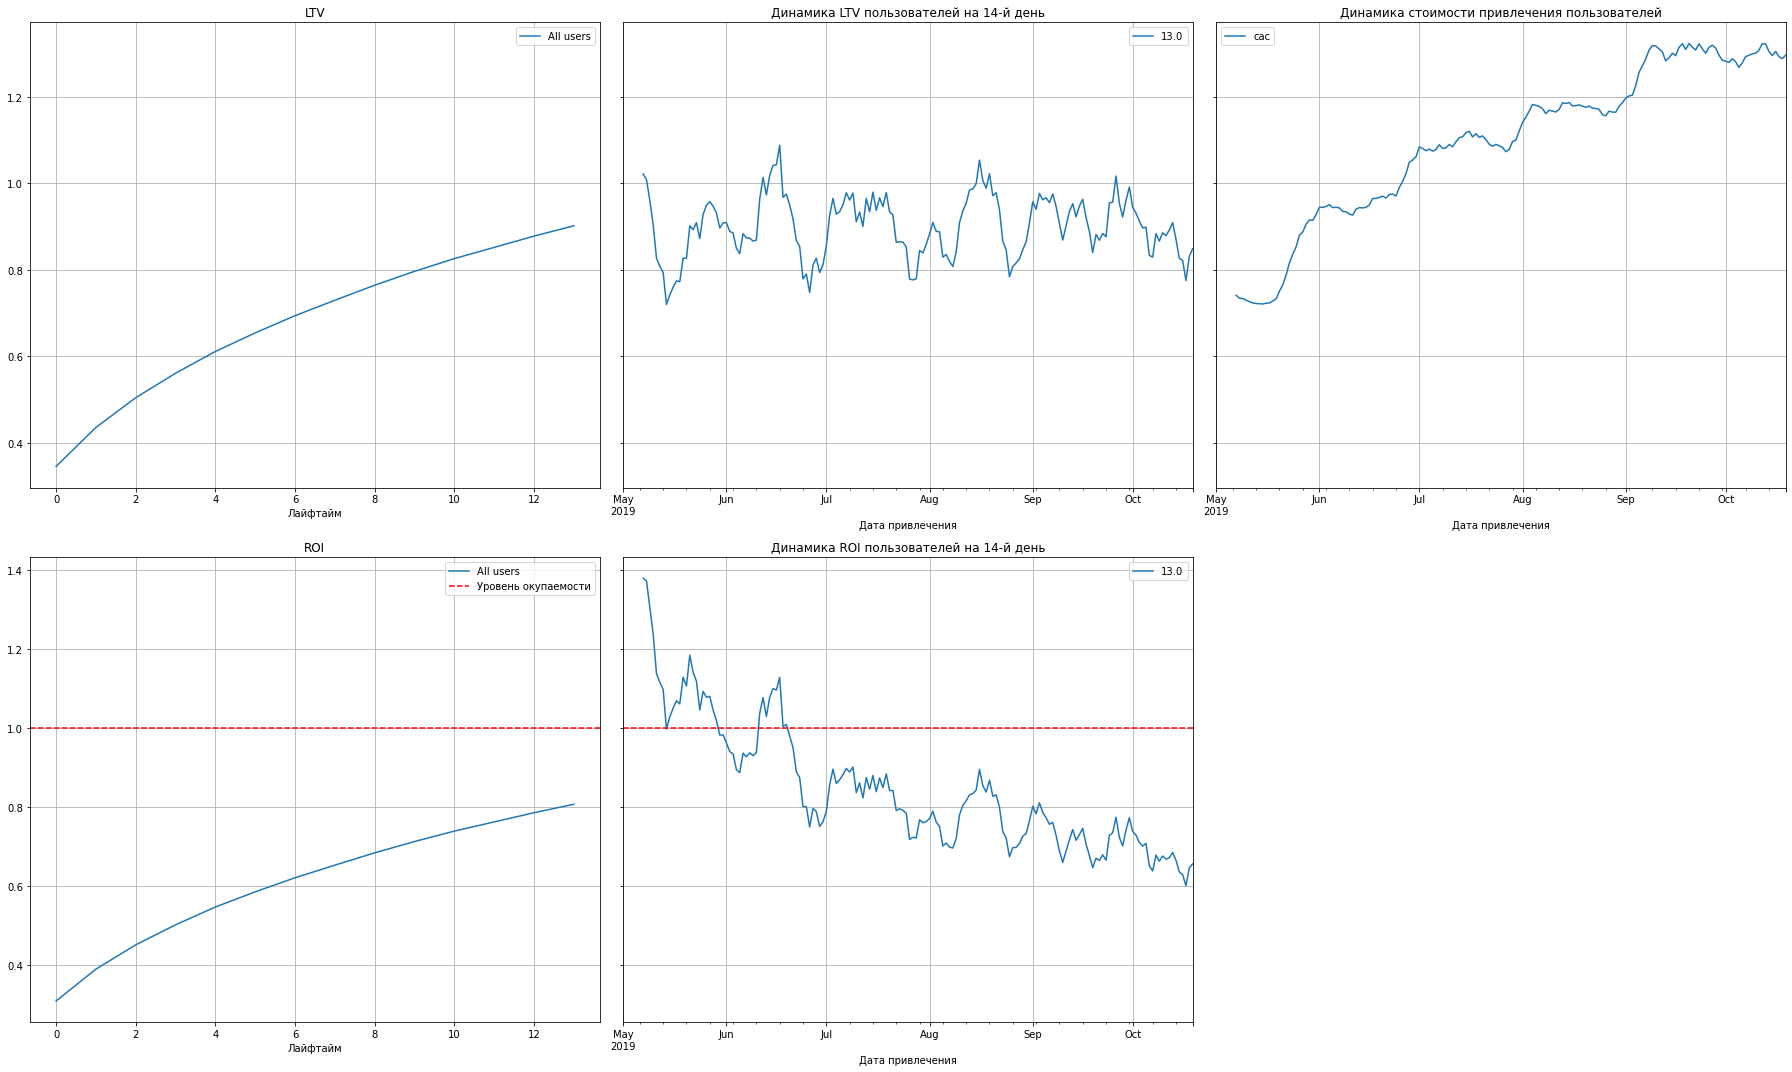

In [28]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

**Вывод** Динамика LTV колеблется примерно от 0,7 до 1,1, но в целом находится на уровне около 0,9. Стоимость привлечения пользователей растет. С середины июня затраты на маркетинг не окупаются вовсе. За рассматриваемый период (14 дней) затраты не окупаются.

- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

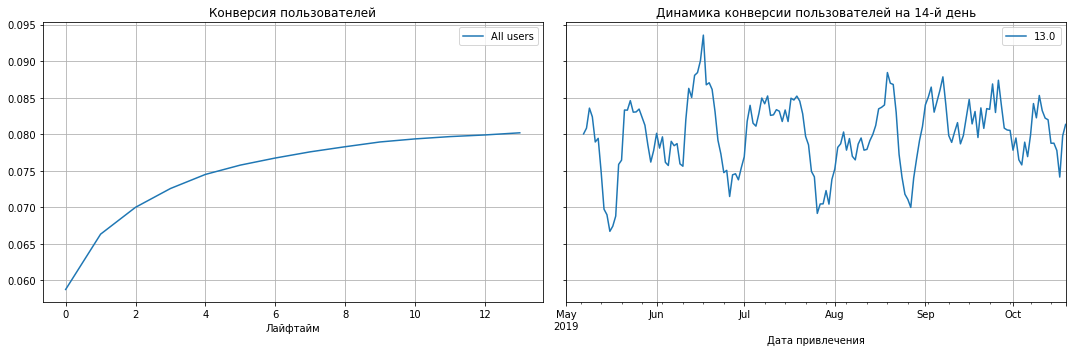

In [29]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

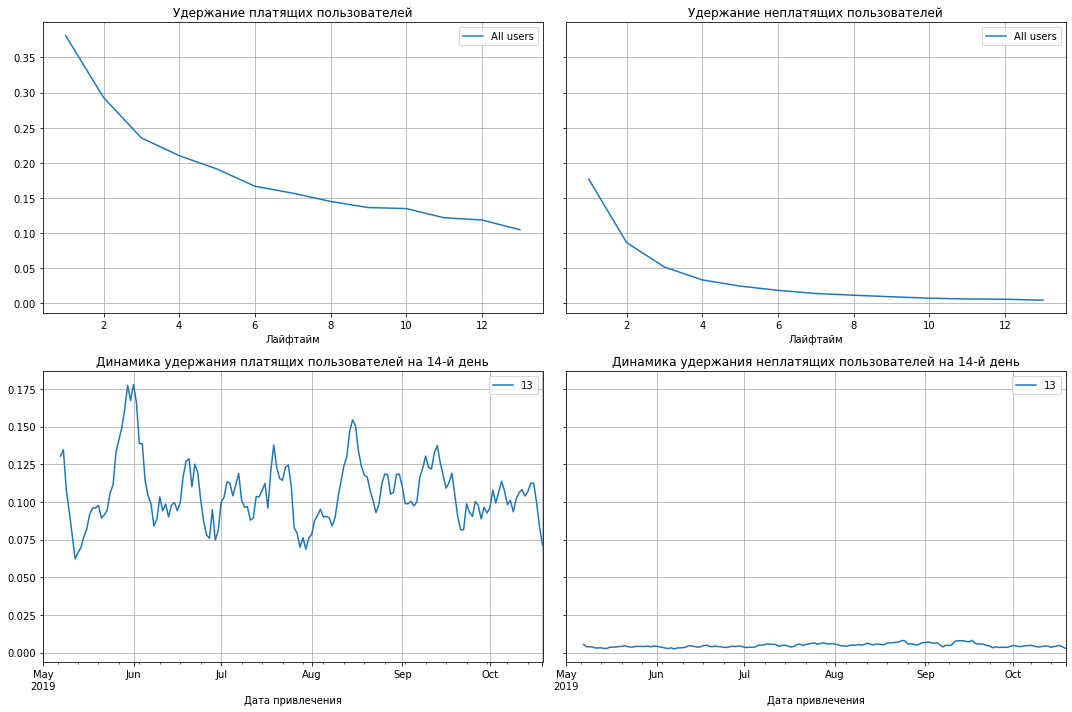

In [30]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)
plot_retention(retention, retention_history, horizon_days, window=7)

**Вывод**
Конверсия пользователей на 14 день приближается к 80%.
Удержание платящих пользователей выше неплатящих в среднем на 20%. На 14 день удержание неплатящих пользователей очень близко к нулю. 

#### Разбивка по устройствам

- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


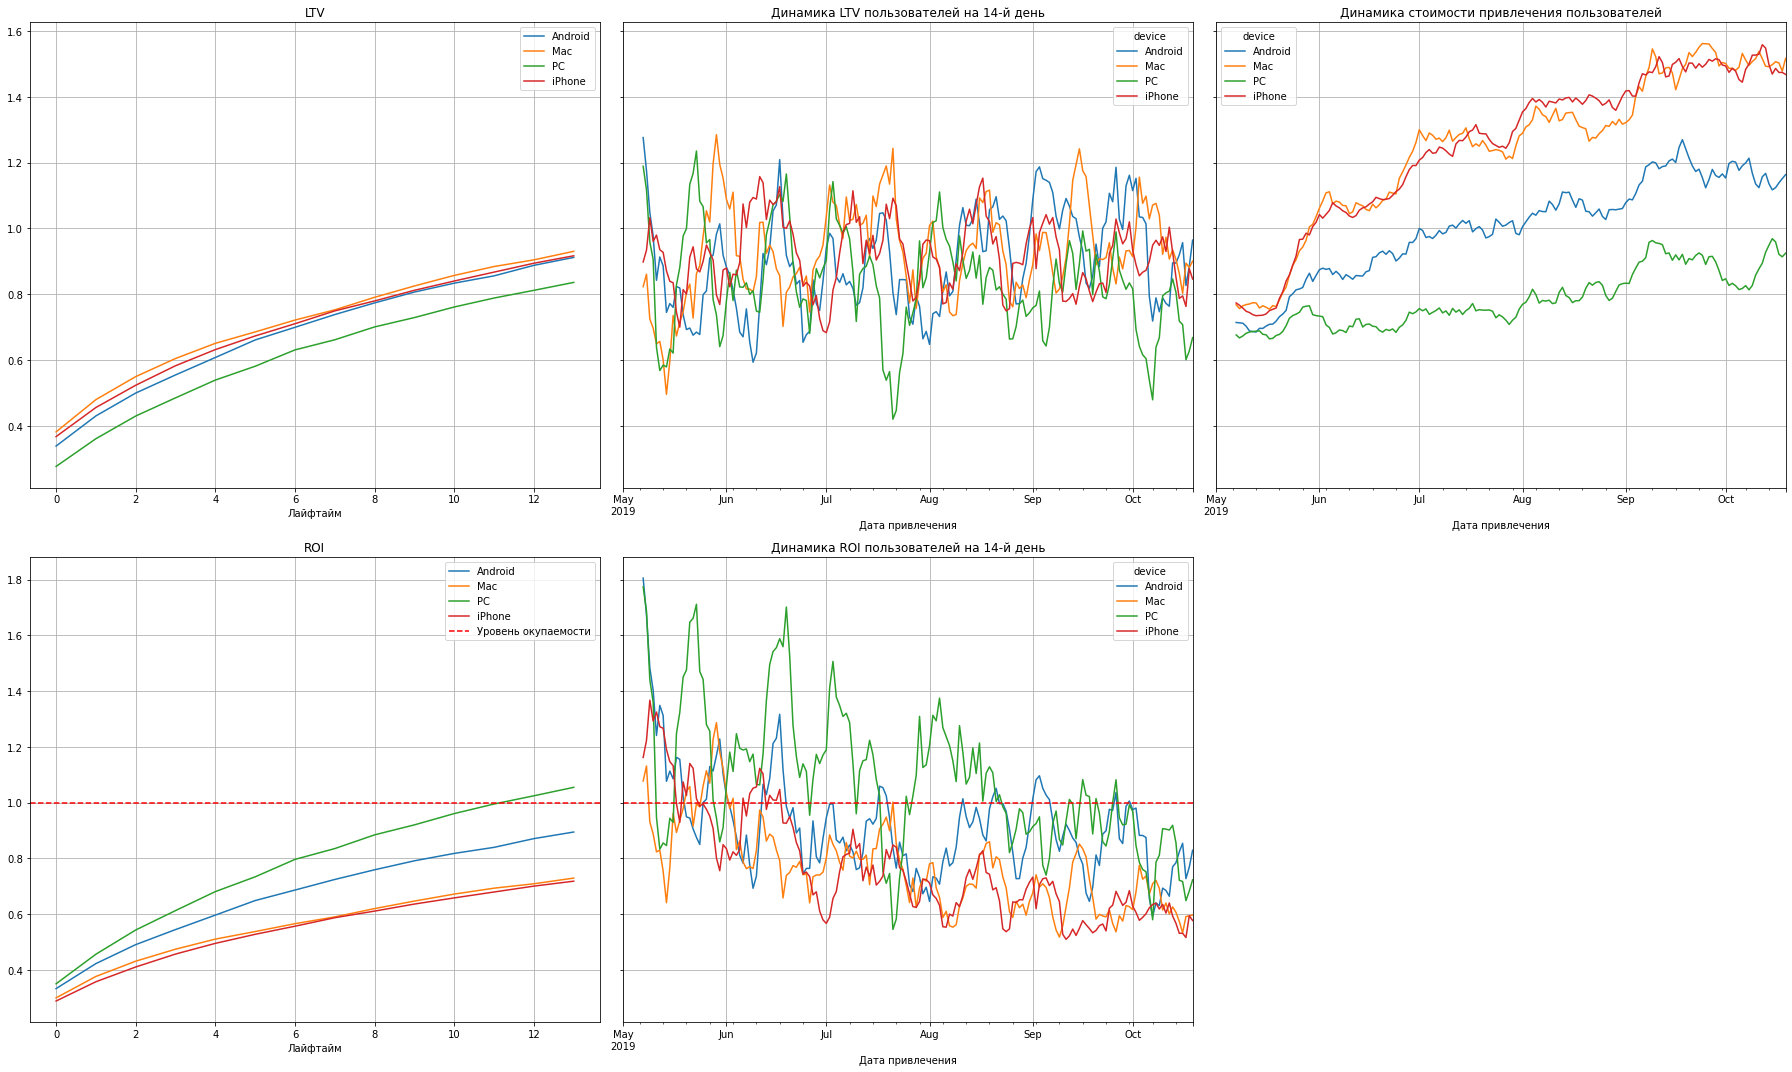

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

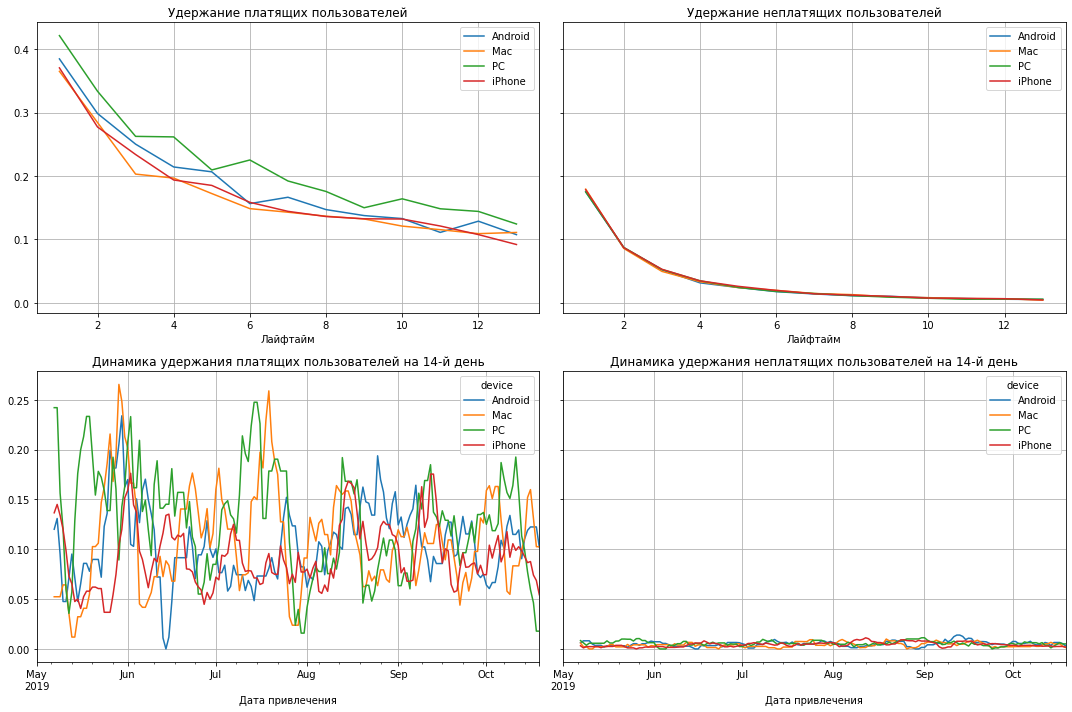

In [32]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention, retention_history, horizon_days, window=7)

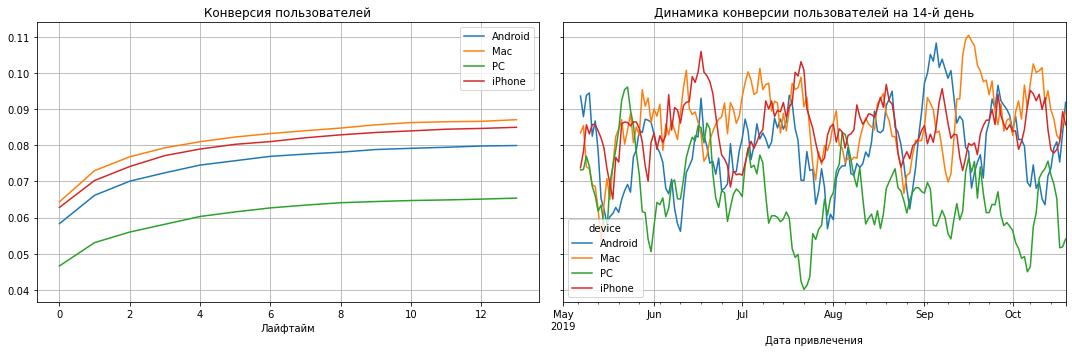

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion, conversion_history, horizon_days, window=7)

**Вывод**
Пользователи PC приносят меньшую выручку компании в сравнении с пользователями других устройств, однако они единственные окупаются примерно на 11 день, так как затраты на их привлечение не такие высокие. Также заметно, что удержание платящих пользователей PC выше, но конверсия заметно меньше. Возможно присутсвуют технические недоработки для системы IOS. Также необходимо работать с клиентами, которые используют PC.

Динамика LTV для всех устройств сильно колеблется, возможно присутствует фактор сезонности. К сожалению, уже к концу сентября затраты на привлечение пользователей не окупились ни с одного устройства, скорее всего из-за того, что стоимость привлечения росла.

#### Разбивка по странам

- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


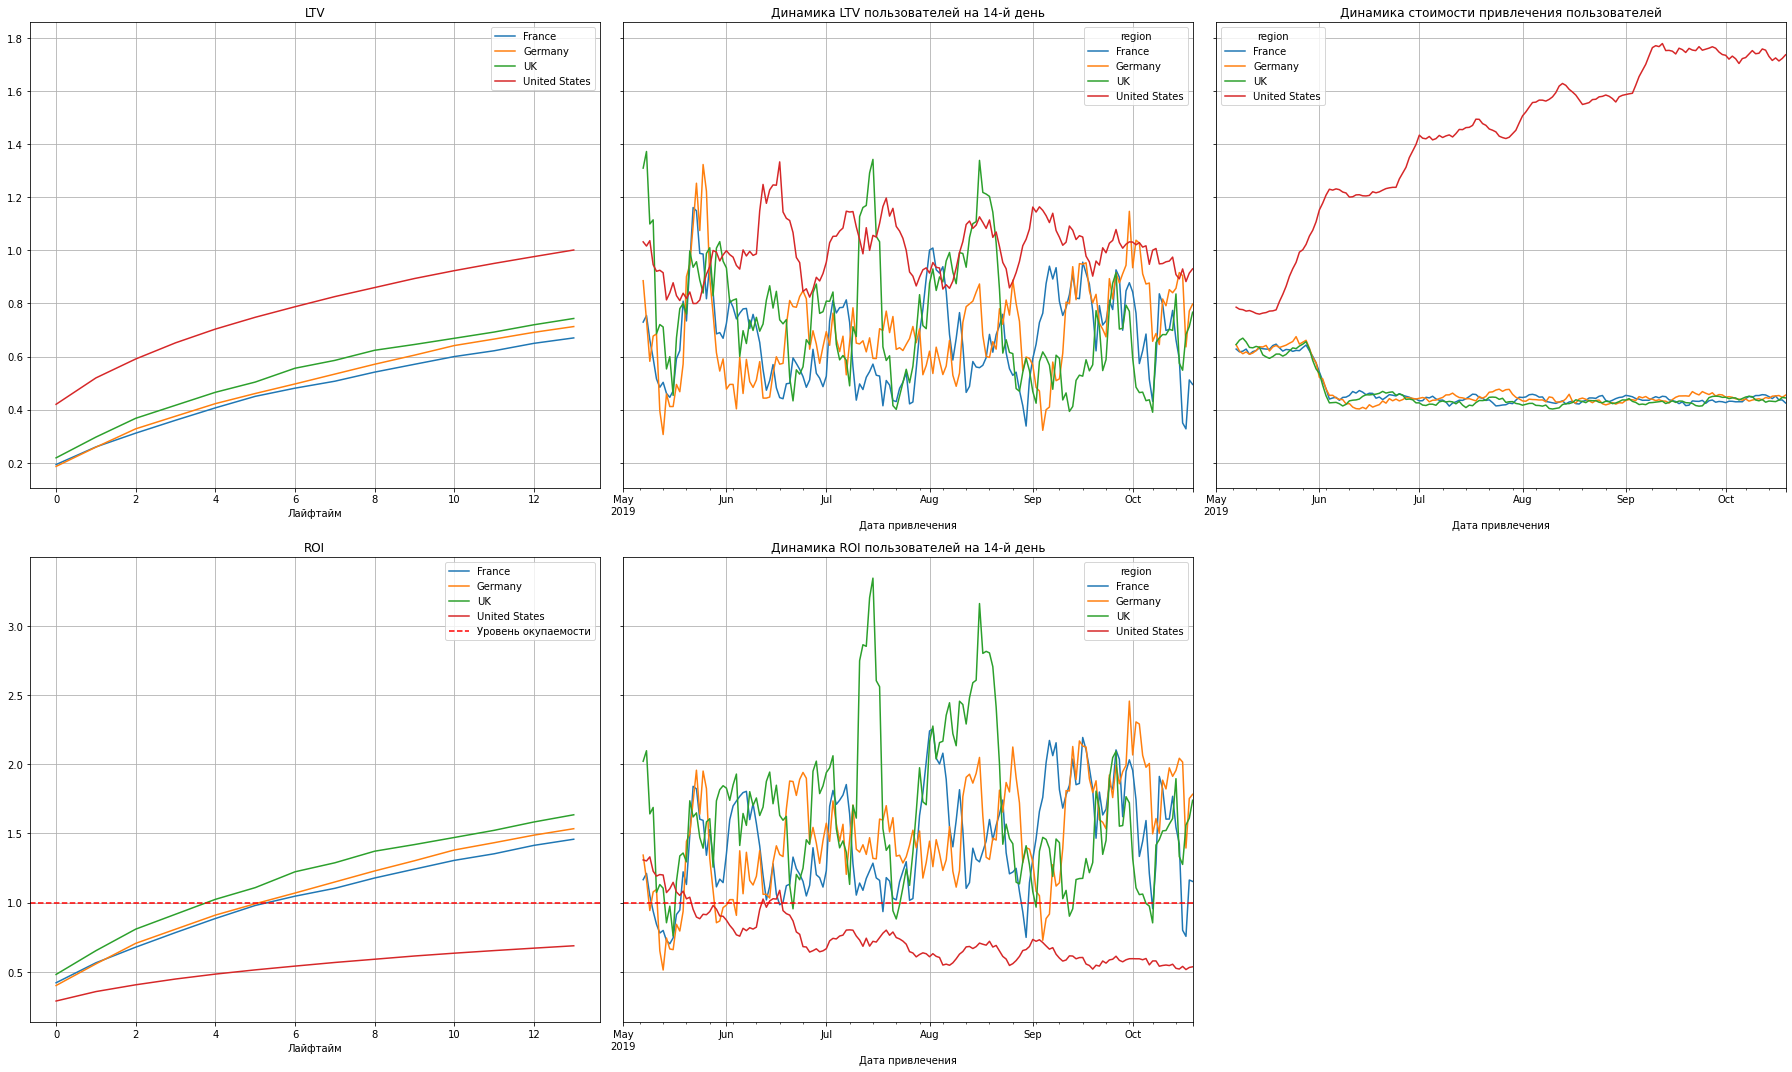

In [34]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

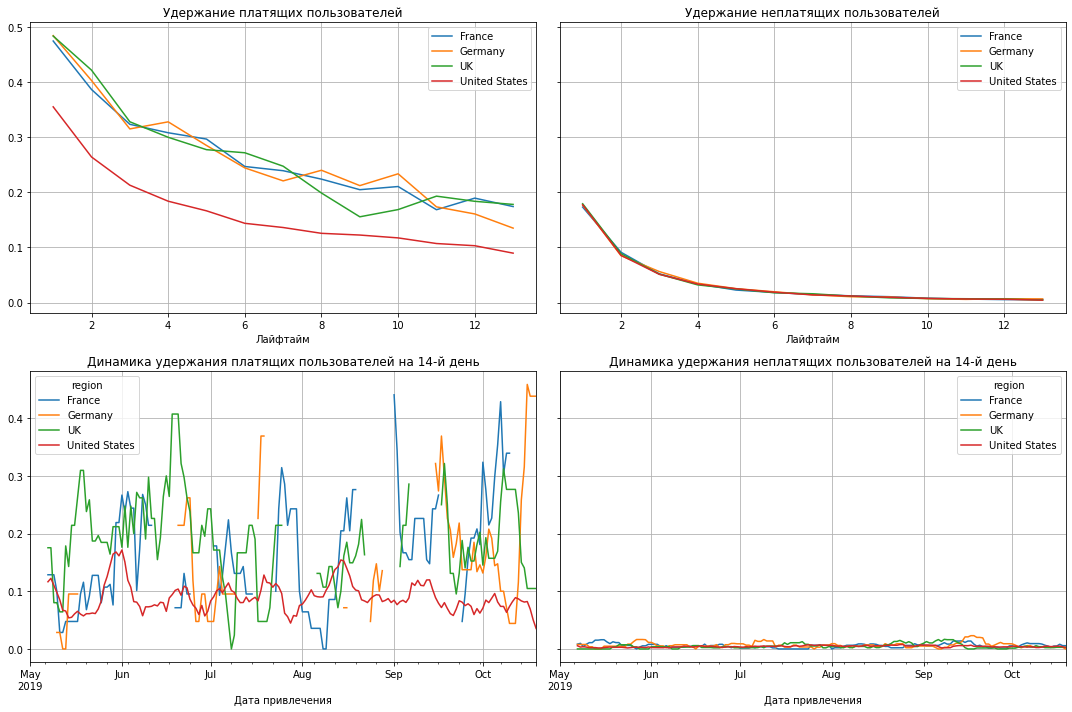

In [35]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention, retention_history, horizon_days, window=7)

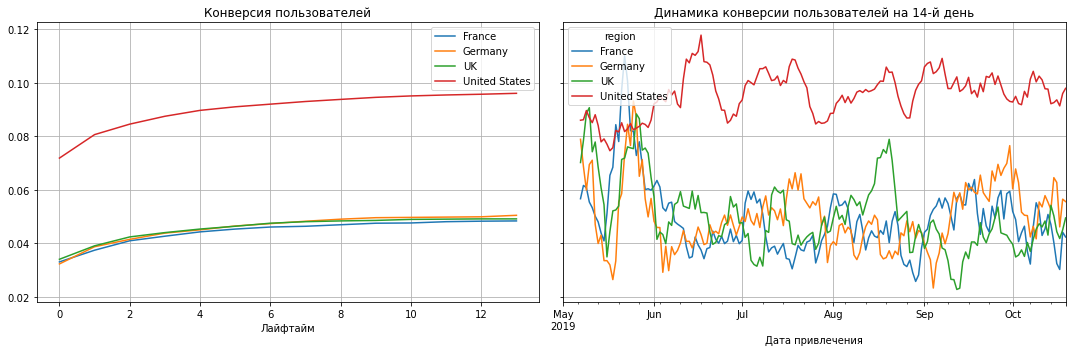

In [36]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion, conversion_history, horizon_days, window=7)

**Вывод** 
Мы видим, что "ценность" клиента из США намного выше, чем из других стран. Однако, стоимость на их привлечение намного выше и продолжает расти, в то время, когда затраты на привлечение клиентов из других стран снижаются.
Выходит, что пользователи из Франции, Великобритании и Германии окупаются, а из США - нет. С каждым месяцем затраты на пользователей из США растут, а доходы остаются примерно такими же.
Клиенты из США хорошо конвертируются, но, к сожалению, плохо удерживаются. 

#### Разбивка по каналам

- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


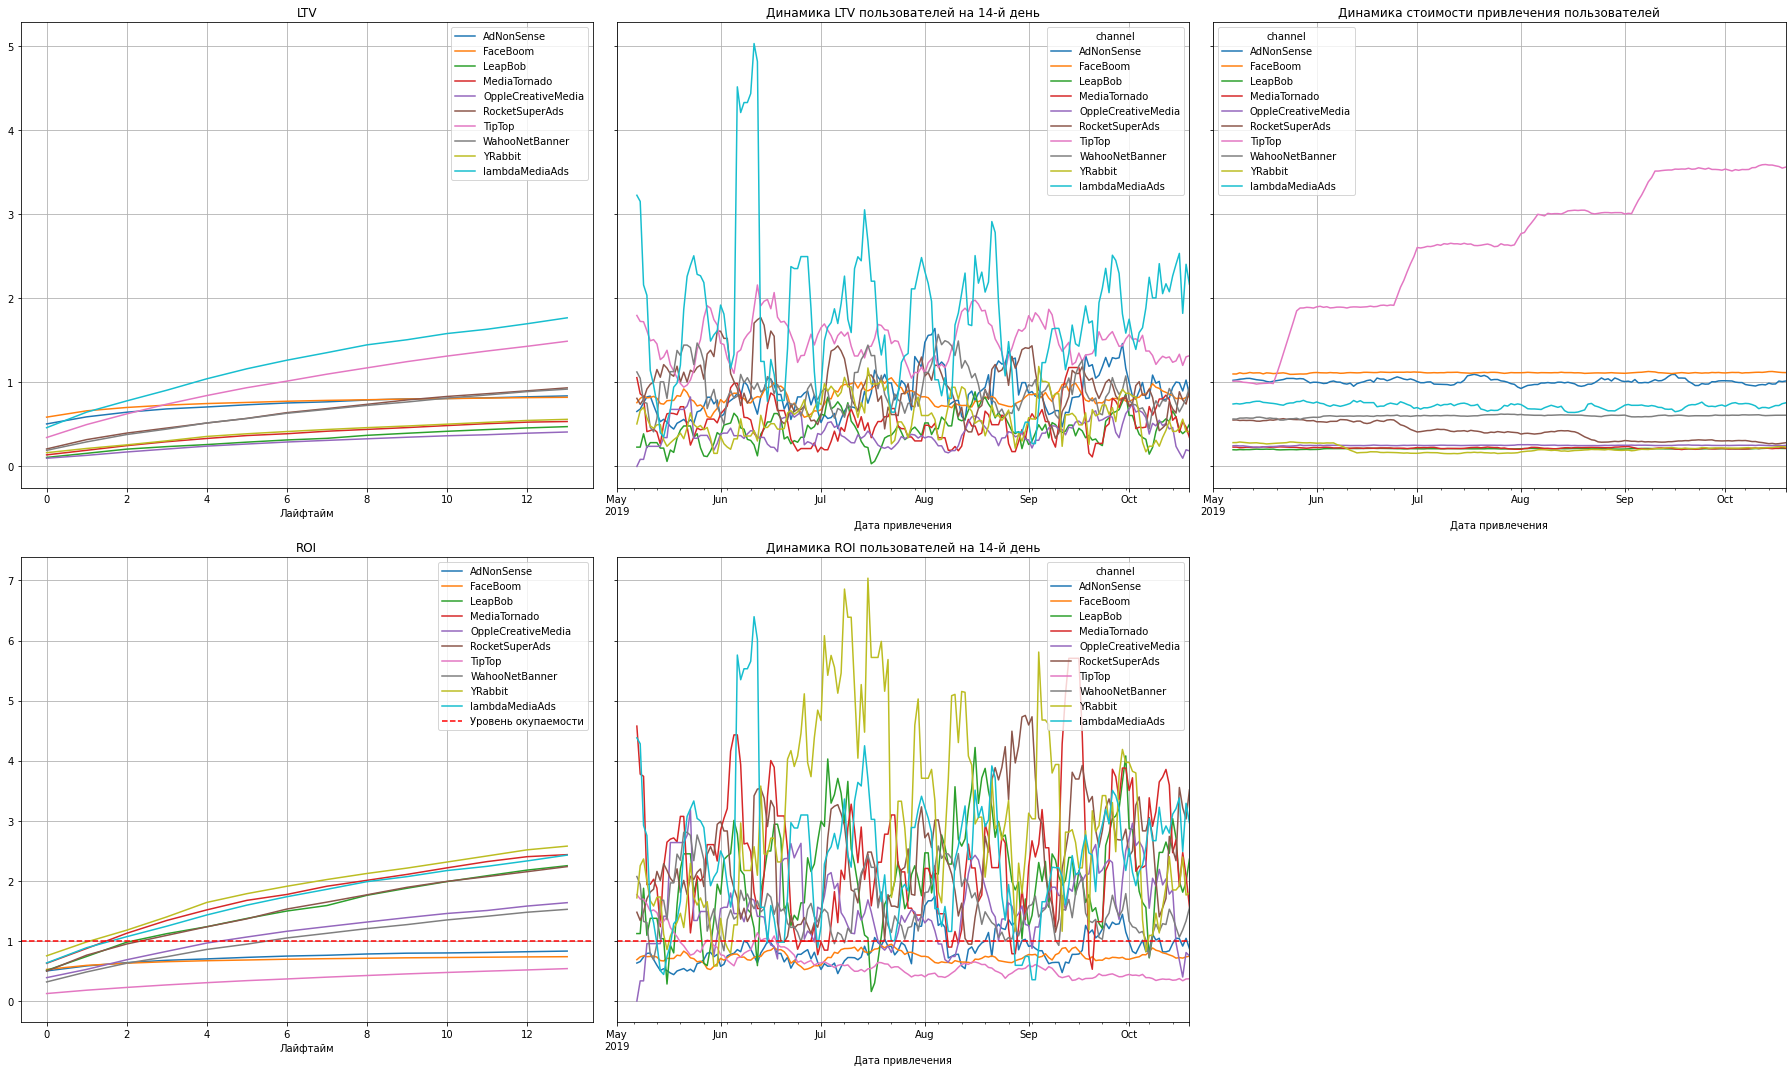

In [37]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

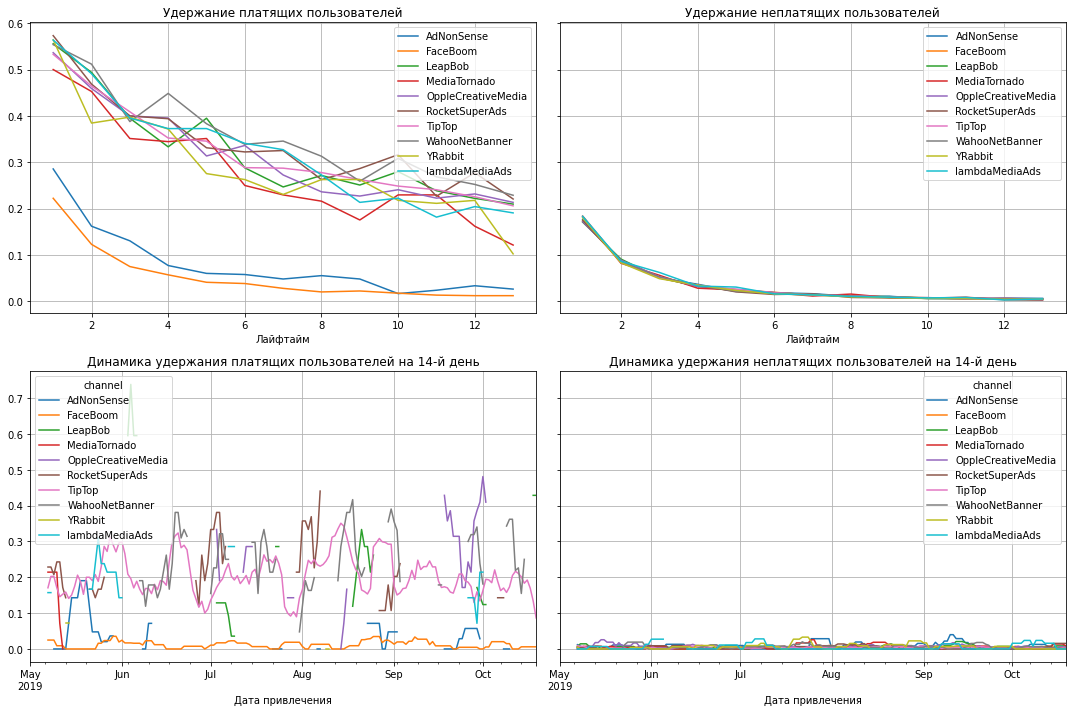

In [38]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_history, horizon_days, window=7)

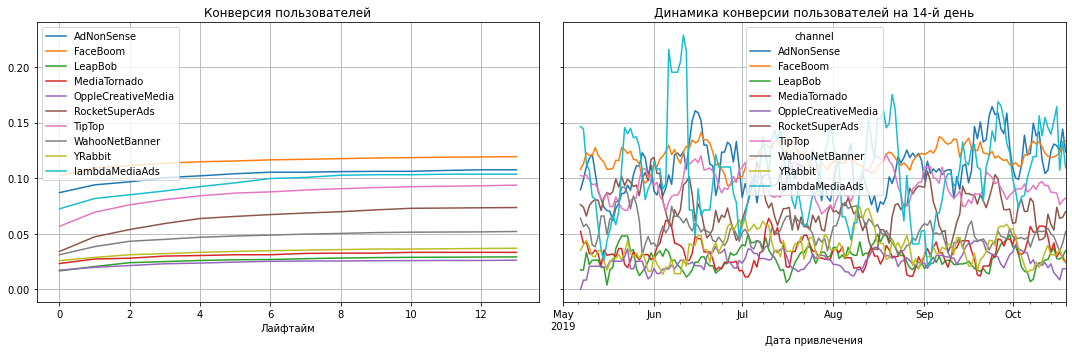

In [39]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon_days, window=7)

**Вывод**
Большую ценность показывают клиенты, привлеченные каналом lambdaMediaAds и Tip Top. Но затраты на привлечение через канал Tip Top намного выше, чем у других, и только продолжают расти. Среди всех каналов три не окупаются: Tip Top (из-за очень большой стоимости привлечения), FaceBoom и AdNonSense.
С удержанием и конверсией знакомая картина: Хорошо конвертируются пользователи привлеченные каналами FaceBoom и AdNonSense, но очень плохо удерживаются. 

**ОБЩИЙ ВЫВОД** 
Реклама в целом не окупается.

Причины этого можно увидеть благодаря анализу поведения пользователей с разбивкой на устройства, страны и каналы привлечения. Так, мы заметили, что на привлечение клиентов, которые пользуются устройствами от Apple требуется больше затрат, из-за чего они не окупаются. Так же заметили, что привлечение пользователей из США выходит для компании слишком дорого. Несмотря на то, что их ценность в сравнении с другими странами выше, они не окупаются. 
Касаемо каналов сделан вывод, что Tip Top, FaceBoom и AdNonSense не окупаются. Особенно сильно заметны высокие расходы на канал Tip Top.


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### **Причины** 

Мы заметили, что затраты на привлечение пользователей не окупаются за рассматриваемый период (14 дней), а также с середины июня расходы настолько превысили доходы, что привлечение пользователей в целом перестало окупаться. 

Судя по анализу окупаемости рекламы с разбивками по разным аспектом можно отметить следующее:
1. Привлечение клиентов, которые пользуются IPhone или Mac, стоит дороже, чем клиентов с Android или PC, а окупаются только пользователи PC
2. Стоимость привлечения пользователей из США в июне заметно выросла и продолжила расти (к концу обследуемого периода затраты на пользователей из США были почти в 5 больше, чем затраты на клиентов из другой страны).
3. Не окупаются 3 канала привлечения: Tip Top, FaceBoom и AdNonSense. В это же время на рекламу через Tip Top было потрачено много денег, можно заметить, что график затрат в США и через Tip Top выглядят похоже, скорее всего именно этот канал популярен в США.

#### **Рекомендации**

1. Перераспределить бюджет с неэффективных каналов (в особенности Tip Top и FaceBoom) на более эффективные, которые показывают хорошие результаты (lambdaMediaAds). 
2. Привлекать больше пользователей PC и Android, хоть и большая часть платящих клиентов среди пользователей IPhone и Mac - их привлечение стоит дороже. Также необходимо выяснить, почему пользователи IPhone и Mac плохо удерживаются (возможно есть недоработки для системы IOS).
3. Поскольку привлечение пользователей из США требует слишком высоких затрат и не окупается, стоит пересмотреть стратегию для этого рынка. Рассмотрите возможность снижения бюджета на привлечение пользователей из США и перераспределения его на более перспективные рынки (возможно стоит выбрать другой канал).
4. Сосредоточьтесь на странах, где LTV пользователей выше и затраты на их привлечение снижаются или остаются стабильными (Франция, Великобритания и Германия).